Authors: Anushree Lahane

### This Jupyter Notebook file runs a linear regression algorithm on ____ data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# setting up the data
all_df=pd.read_csv('real_estate_dataset/realest_data.csv', index_col=False)
all_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Defining the features (X) and the target variable (y) 

In [3]:
X = all_df [['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = all_df['Y house price of unit area']

### Splitting the data into training and testing sets  (80% training, 20% testing)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initializing the Linear regression model

In [5]:
lr_model = LinearRegression()

### Training the model using training data 

In [6]:
lr_model.fit(X_train, y_train)

LinearRegression()

### Predicting on the test data 

In [7]:
y_pred = lr_model.predict(X_test)

### Calculating the mean squared error for model evaluation 

In [ ]:
 #Calculates the MSE between the actual values and the predicted values
mse = mean_squared_error(y_test, y_pred)      
print(f"Mean Squared Error is: {mse:.3f}")  

Mean Squared Error is: 54.581


### Calculating the R-squared value

In [ ]:
# Higher the R-squared value , better the model performance
r_squared = lr_model.score(X_test, y_test)
print(f"R-squared value is: {r_squared:.3f}")

R-squared value is: 0.675


### K-fold cross-validation 

In [12]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Defining the number of folds 
k = 5

# Performing k-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=k, scoring='neg_mean_squared_error')

# Calculating the mean and standard deviation of MSE
mean_mse = -cv_scores.mean()  # converting negative MSE to positive
std_mse = cv_scores.std()

print(f"{k}-Fold Cross-Validation Mean MSE: {mean_mse:.3f}")
print(f"{k}-Fold Cross-Validation MSE Standard Deviation: {std_mse:.3f}")

5-Fold Cross-Validation Mean MSE: 79.944
5-Fold Cross-Validation MSE Standard Deviation: 31.762


### Plotting the predicted vs actual values

C:\Users\hp\AppData\Local\Temp\ipykernel_13368\2649558005.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


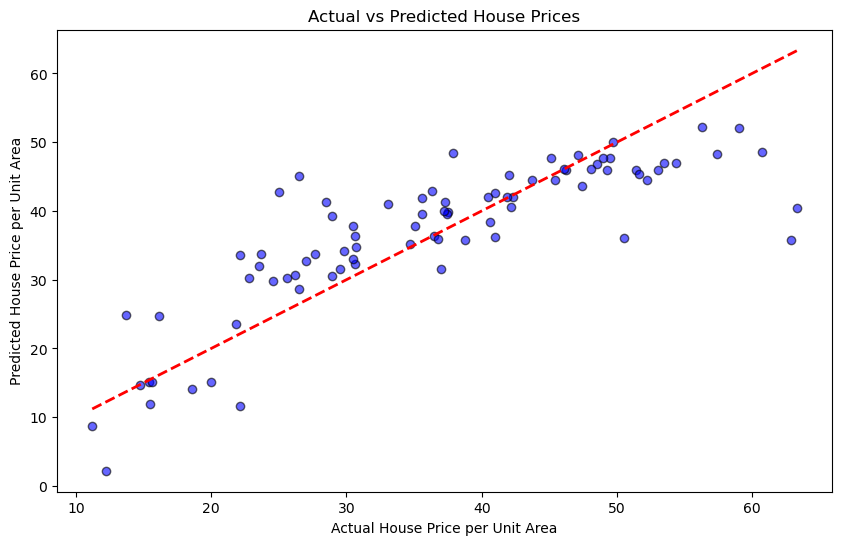

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual House Price per Unit Area')
plt.ylabel('Predicted House Price per Unit Area')
plt.title('Actual vs Predicted House Prices')
plt.show()

### Printing the coefficients

In [26]:
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
X2 house age                              -0.270593
X3 distance to the nearest MRT station    -0.004552
X4 number of convenience stores            1.105121
X5 latitude                              236.092831
X6 longitude                             -23.903694


### RESULTS 

An R-squared score of 67.5% suggests that this linear regression model provides a moderate fit for the dataset, capturing around two-thirds of the variability in house prices.Overall, linear regression is a reasonable choice for this dataset. However, given the moderate R-squared score and variability in cross-validation MSE, the model’s performance may improve with additional features or a more complex approach.